In [2]:
import pandas as pd
df = pd.read_csv("data/Madden_Scores.csv")

In [3]:
df.head()

,Game,Url,System,Critic Score,# of Critic Reviews,User Score,# of User Reviews,delta_scores,year
0,Madden 2001,https://www.metacritic.com/game/playstation-2/...,PlayStation 2,91,25,75,10,16,1
1,Madden 2002,https://www.metacritic.com/game/playstation-2/...,PlayStation 2,94,23,73,49,21,2
2,Madden 2003,https://www.metacritic.com/game/playstation-2/...,PlayStation 2,95,25,76,68,19,3
3,Madden 2004,https://www.metacritic.com/game/playstation-2/...,PlayStation 2,94,29,83,149,11,4
4,Madden 2005,https://www.metacritic.com/game/playstation-2/...,PlayStation 2,91,30,80,84,11,5


In [4]:
df2 = df[["year", 'Critic Score','User Score']]
df2 = df2.melt(id_vars="year")
df2.columns = ['Madden Year', "Score Origin", "Score Value"]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

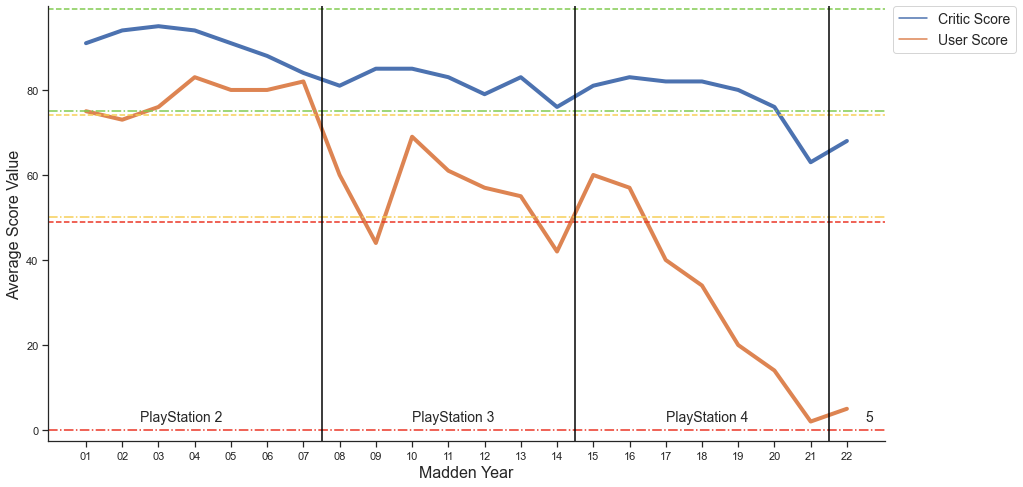

In [6]:
plt.figure(figsize=(15,8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=df2, x='Madden Year', y='Score Value', hue='Score Origin', linewidth=4)

# add the threshold value (optional)
plt.axhline(99, color='#80CA4E', linestyle='--')
plt.axhline(75, color='#80CA4E', linestyle='dashdot')
plt.axhline(74, color='#F7CE55', linestyle='--')
plt.axhline(50, color='#F7CE55', linestyle='dashdot')
plt.axhline(49, color='#EA3323', linestyle='--')
plt.axhline(0, color='#EA3323', linestyle='dashdot')


plt.axvline(6.5, 0, color='black')
plt.axvline(13.5, 0, color='black')
plt.axvline(20.5, 0, color='black')
plt.text(1.5, 2, "PlayStation 2", fontsize=14)
plt.text(9, 2, "PlayStation 3", fontsize=14)
plt.text(16, 2, "PlayStation 4", fontsize=14)
plt.text(21.5, 2, "5", fontsize=14)

plt.ylabel('Average Score Value', fontsize=16)
plt.xlabel('Madden Year', fontsize=16)

# 8 Terrible users
## 

## 6 years (Almost 7) (all in PS2 where both users and critics agreed that it was a good game)


plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.savefig("images/Scores_Over_Time.png", bbox_inches='tight', dpi=200)

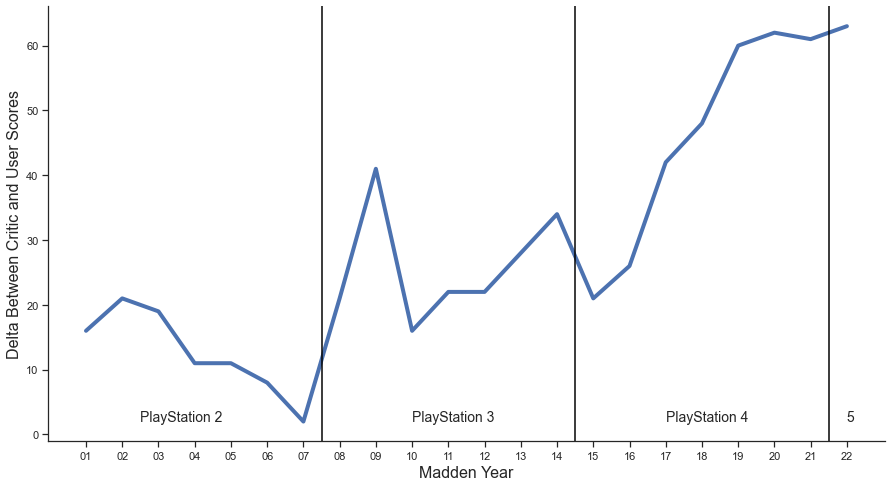

In [7]:
plt.figure(figsize=(15,8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=df, x='year', y='delta_scores', linewidth=4)



plt.axvline(6.5, 0, color='black')
plt.axvline(13.5, 0, color='black')
plt.axvline(20.5, 0, color='black')
plt.text(1.5, 2, "PlayStation 2", fontsize=14)
plt.text(9, 2, "PlayStation 3", fontsize=14)
plt.text(16, 2, "PlayStation 4", fontsize=14)
plt.text(21, 2, "5", fontsize=14)

plt.ylabel('Delta Between Critic and User Scores', fontsize=16)
plt.xlabel('Madden Year', fontsize=16)

# 8 Terrible users
## 

## 6 years (Almost 7) (all in PS2 where both users and critics agreed that it was a good game)

plt.savefig("images/Scores_Delta.png", bbox_inches='tight', dpi=200)

In [8]:
df2 = df[['year', 'System', 'Critic Score', 'User Score']]
df2 = df2.melt(id_vars=['year', 'System'])

In [9]:
df2.columns = ["Year", "System", "Scoring System", "value"]
df2.head()

,Year,System,Scoring System,value
0,01,PlayStation 2,Critic Score,91
1,02,PlayStation 2,Critic Score,94
2,03,PlayStation 2,Critic Score,95
3,04,PlayStation 2,Critic Score,94
4,05,PlayStation 2,Critic Score,91


In [10]:
import scipy
scipy.stats.kruskal(*[group["value"].values for name, group in df2.groupby("System")])


KruskalResult(statistic=14.729714326063704, pvalue=0.0020628190266610367)

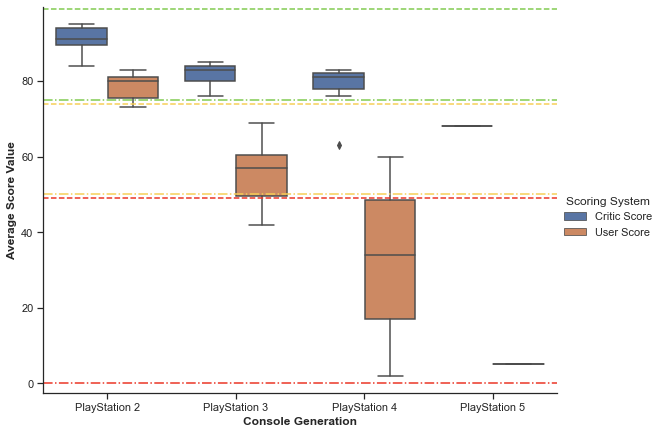

In [11]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.catplot(x='System', 
            y='value',
            hue="Scoring System",
            kind="box",
            data=df2, 
            height=6, 
            aspect=1.3)
plt.xlabel("Console Generation", fontweight="bold")
plt.ylabel("Average Score Value", fontweight="bold")

plt.axhline(99, color='#80CA4E', linestyle='--')
plt.axhline(75, color='#80CA4E', linestyle='dashdot')
plt.axhline(74, color='#F7CE55', linestyle='--')
plt.axhline(50, color='#F7CE55', linestyle='dashdot')
plt.axhline(49, color='#EA3323', linestyle='--')
plt.axhline(0, color='#EA3323', linestyle='dashdot')

plt.savefig("images/Ratings_by_Console_Generation.png", dpi=300, bbox_inches='tight')

In [12]:
## Before and after MUT
df2 = df[['year', 'Critic Score', 'User Score']]
df2['year'] = df2['year'].astype(int)
df2['MUT'] = ["MUT" if x>=10 else "pre-MUT" for x in df2['year']]
df2 = df2.melt(id_vars=['year', "MUT"])
df2.columns = ["Year", "MUT", "Scoring System", "value"]

<ipython-input-12-a3c2a00438f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['year'].astype(int)
<ipython-input-12-a3c2a00438f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MUT'] = ["MUT" if x>=10 else "pre-MUT" for x in df2['year']]


In [13]:
import scipy
scipy.stats.kruskal(*[group["value"].values for name, group in df2.groupby("MUT")])


KruskalResult(statistic=10.715731396284973, pvalue=0.0010622845846429236)

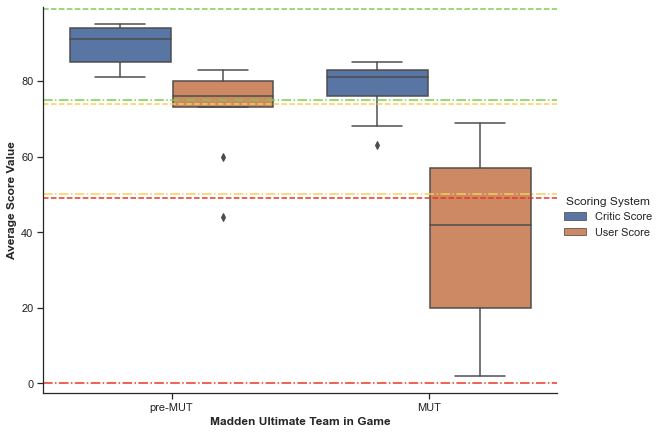

In [14]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.catplot(x='MUT', 
            y='value',
            hue="Scoring System",
            kind="box",
            data=df2, 
            height=6, 
            aspect=1.3)
plt.xlabel("Madden Ultimate Team in Game", fontweight="bold")
plt.ylabel("Average Score Value", fontweight="bold")

plt.axhline(99, color='#80CA4E', linestyle='--')
plt.axhline(75, color='#80CA4E', linestyle='dashdot')
plt.axhline(74, color='#F7CE55', linestyle='--')
plt.axhline(50, color='#F7CE55', linestyle='dashdot')
plt.axhline(49, color='#EA3323', linestyle='--')
plt.axhline(0, color='#EA3323', linestyle='dashdot')

plt.savefig("images/Ratings_by_MUT.png", dpi=300, bbox_inches='tight')

In [15]:
## Before and after MUT
df2 = df[['year', 'Critic Score', 'User Score']]
df2['year'] = df2['year'].astype(int)
df2['Engine'] = ["Frostbite" if x>=18 else "pre-Frostbite" for x in df2['year']]
df2 = df2.melt(id_vars=['year', "Engine"])
df2.columns = ["Year", "Engine", "Scoring System", "value"]
scipy.stats.kruskal(*[group["value"].values for name, group in df2.groupby("Engine")])


<ipython-input-15-dc02a359aeff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['year'].astype(int)
<ipython-input-15-dc02a359aeff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Engine'] = ["Frostbite" if x>=18 else "pre-Frostbite" for x in df2['year']]


KruskalResult(statistic=8.337235518413006, pvalue=0.0038840654438371015)

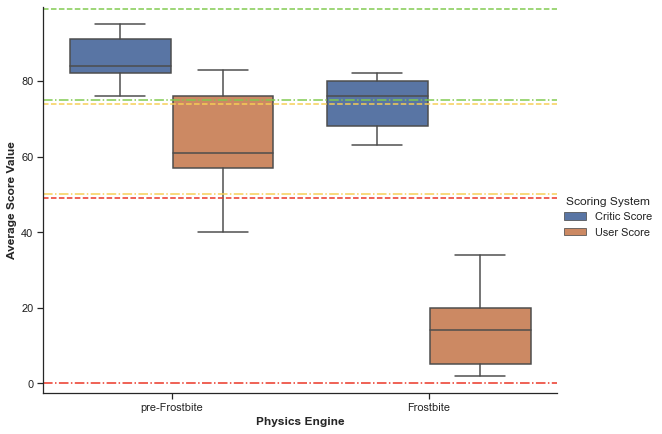

In [16]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.catplot(x='Engine', 
            y='value',
            hue="Scoring System",
            kind="box",
            data=df2, 
            height=6, 
            aspect=1.3)
plt.xlabel("Physics Engine", fontweight="bold")
plt.ylabel("Average Score Value", fontweight="bold")

plt.axhline(99, color='#80CA4E', linestyle='--')
plt.axhline(75, color='#80CA4E', linestyle='dashdot')
plt.axhline(74, color='#F7CE55', linestyle='--')
plt.axhline(50, color='#F7CE55', linestyle='dashdot')
plt.axhline(49, color='#EA3323', linestyle='--')
plt.axhline(0, color='#EA3323', linestyle='dashdot')

plt.savefig("images/Ratings_by_Engine.png", dpi=300, bbox_inches='tight')